In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
import datetime

In [2]:
DATA_PATH = 'Data'
MODEL_PATH = 'Trained Models'

def load_images_from_folder(folder):
    images = []
    if len(os.listdir(folder)) > 0:
        for filename in os.listdir(folder):
            img_path = os.path.join(folder, filename)
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)  
            if img is not None:
                img_resized = cv2.resize(img, (40, 40))  
                images.append(img_resized)
        return np.array(images)
    else:
        raise FileNotFoundError

In [3]:
folders = [os.path.join(DATA_PATH, str(i)) for i in range(10)]
print(f"Folder paths = {folders}")

data = []
labels = []
for i, folder in enumerate(folders):
    print("Reading from folder = {}".format({folder}))
    folder_images = load_images_from_folder(folder)
    folder_labels = np.full(shape = len(folder_images), fill_value = i)
    X_train, X_test, y_train, y_test = train_test_split(folder_images, folder_labels, test_size=0.3, random_state=42, shuffle=True) 
    data.append((X_train, X_test))
    labels.append((y_train, y_test))

Folder paths = ['Data\\0', 'Data\\1', 'Data\\2', 'Data\\3', 'Data\\4', 'Data\\5', 'Data\\6', 'Data\\7', 'Data\\8', 'Data\\9']
Reading from folder = {'Data\\0'}
Reading from folder = {'Data\\1'}
Reading from folder = {'Data\\2'}
Reading from folder = {'Data\\3'}
Reading from folder = {'Data\\4'}
Reading from folder = {'Data\\5'}
Reading from folder = {'Data\\6'}
Reading from folder = {'Data\\7'}
Reading from folder = {'Data\\8'}
Reading from folder = {'Data\\9'}


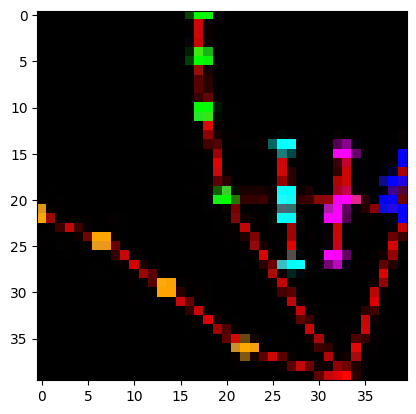

In [4]:
plt.imshow(data[3][0][0])
plt.show()    

In [9]:
X_train = np.concatenate([arr[0] for arr in data])/255.0
X_test = np.concatenate([arr[1] for arr in data])/255.0

y_train = np.concatenate([arr[0] for arr in labels])/255.0
y_test = np.concatenate([arr[1] for arr in labels])/255.0

In [10]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same',  activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [11]:
input_shape = (40, 40, 3)
num_classes = len(folders)

model = create_cnn_model(input_shape, num_classes)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 40, 40, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 20, 20, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 504,266 (1.92 MB)

 Trainable params: 504,266 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
import time
start_time = time.time()

# Compiling and training of model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

end_time = time.time()
training_time = end_time - start_time
print(f"Training time: {training_time:.2f} seconds")

Epoch 1/10
799/799 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.1010 - loss: 0.0409 - val_accuracy: 0.1024 - val_loss: 0.0000e+00
Epoch 2/10
799/799 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.1001 - loss: 0.0000e+00 - val_accuracy: 0.1024 - val_loss: 0.0000e+00
Epoch 3/10
799/799 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.1045 - loss: 0.0000e+00 - val_accuracy: 0.1024 - val_loss: 0.0000e+00
Epoch 4/10
799/799 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.1020 - loss: 0.0000e+00 - val_accuracy: 0.1024 - val_loss: 0.0000e+00
Epoch 5/10
799/799 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.1048 - loss: 0.0000e+00 - val_accuracy: 0.1024 - val_loss: 0.0000e+00
Epoch 6/10
799/799 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.1028 - loss: 0.0000e+00 - val_accuracy: 0.1024 - val_loss: 0.0000e+00
Epoch 7/10
799/799 ━━━━━━━━━━━━━━━━━━━━ 25s 31ms/step - accuracy: 0.1010 - loss: 0.0000e+00 - val_accuracy: 0.1024 - val_loss: 0.0000e+00
Epoch 8/10
799/799 ━━━━━━━━━━━━━━━━━━━

In [13]:
model.evaluate(X_test, y_test)

343/343 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.3332 - loss: 0.0000e+00


[0.0, 0.10235573351383209]

In [14]:
res = model.predict(X_test)
res = [np.argmax(val) for val in res]
print(res)

343/343 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [15]:
from datetime import datetime

current_datetime = datetime.today()
datetime_string = current_datetime.strftime("%Y-%m-%d %H-%M-%S")

model.save(os.path.join(MODEL_PATH, datetime_string) + '.keras')